In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re as re
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('data/titanic/train.csv',header=0, dtype={'Age': np.float64})
test=pd.read_csv('data/titanic/test.csv',header=0,dtype={'Age':np.float64})
full_data=[train, test]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
me=train.Survived.groupby(train.Pclass).mean()
print(type(me))
me

<class 'pandas.core.series.Series'>


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
me2=train.Survived.groupby(train.Pclass).mean().reset_index()
print(type(me2))
print(me2.columns)
me2

<class 'pandas.core.frame.DataFrame'>
Index(['Pclass', 'Survived'], dtype='object')


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
me3=train[['Survived','Pclass']].groupby('Pclass', as_index=False).mean()
print(type(me3))
me3

<class 'pandas.core.frame.DataFrame'>


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [34]:
train.Survived.groupby(train.Sex).mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
for data in full_data:
    data['Family']=data['SibSp'] + data['Parch'] + 1

In [36]:
family=train[['Family','Survived']].groupby('Family', as_index=False).mean()
family

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [40]:
train.Family.value_counts().reset_index()

,index,Family
0,1,537
1,2,161
2,3,102
3,4,29
4,6,22
5,5,15
6,7,12
7,11,7
8,8,6


In [41]:
family_count=train.Family.value_counts().reset_index()
family_count.columns=['Family','count']
family_count

,Family,count
0,1,537
1,2,161
2,3,102
3,4,29
4,6,22
5,5,15
6,7,12
7,11,7
8,8,6


In [44]:
pd.merge(family, family_count, on='Family')

,Family,Survived,count
0,1,0.303538,537
1,2,0.552795,161
2,3,0.578431,102
3,4,0.724138,29
4,5,0.200000,15
5,6,0.136364,22
6,7,0.333333,12
7,8,0.000000,6
8,11,0.000000,7


In [45]:
for data in full_data:
    data['Alone']=0
    data.Alone[data.Family==1]=1

In [46]:
train.Survived.groupby(train.Alone).mean().reset_index()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [47]:
for data in full_data:
    data['Embarked'].fillna('S')
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [49]:
train.Fare.isnull().sum()

0

In [48]:
train.Fare.fillna(train.Fare.median())
quantiles=pd.qcut(train.Fare, 4, labels=['q1','q2','q3','q4'])
quantiles

0      q1
1      q4
2      q2
3      q4
4      q2
5      q2
6      q4
7      q3
8      q2
9      q3
10     q3
11     q3
12     q2
13     q4
14     q1
15     q3
16     q3
17     q2
18     q3
19     q1
20     q3
21     q2
22     q2
23     q4
24     q3
25     q4
26     q1
27     q4
28     q1
29     q1
       ..
861    q2
862    q3
863    q4
864    q2
865    q2
866    q2
867    q4
868    q2
869    q2
870    q1
871    q4
872    q1
873    q2
874    q3
875    q1
876    q2
877    q1
878    q1
879    q4
880    q3
881    q1
882    q2
883    q2
884    q1
885    q3
886    q2
887    q3
888    q3
889    q3
890    q1
Name: Fare, Length: 891, dtype: category
Categories (4, object): [q1 < q2 < q3 < q4]

In [50]:
train.Survived.groupby(quantiles).mean().reset_index()

,Fare,Survived
0,q1,0.197309
1,q2,0.303571
2,q3,0.454955
3,q4,0.581081


In [51]:
train.Age.isnull().sum()

177

In [53]:
np.random.randint(0,6,3)

array([4, 5, 5])

In [54]:
for data in full_data:
    avg_mean=data.Age.mean()
    avg_std=data.Age.std()
    avg_size=data.Age.isnull().sum()
    fill_v=np.random.randint(avg_mean-avg_std, avg_mean+avg_std, size=avg_size)
    data.Age[data.Age.isnull()]=fill_v

In [55]:
pd.cut(train.Age, 5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5      (16.336, 32.252]
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17     (16.336, 32.252]
18     (16.336, 32.252]
19     (16.336, 32.252]
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26     (32.252, 48.168]
27     (16.336, 32.252]
28     (16.336, 32.252]
29     (32.252, 48.168]
             ...       
861    (16.336, 32.252]
862    (32.252, 48.168]
863    (32.252, 48.168]
864    (16.336, 32.252]
865    (32.252, 48.168]
866    (16.336, 32.252]
867    (16.336, 32.252]
868    (16.336, 32.252]
869      (0.34, 16.336]
870    (16.336, 32.252]
871    (32.252, 

In [56]:
train['categoriesAge']=pd.cut(train.Age, 5)
train[['Survived','categoriesAge']].groupby('categoriesAge', as_index=False).mean()

,categoriesAge,Survived
0,"(0.34, 16.336]",0.526786
1,"(16.336, 32.252]",0.344671
2,"(32.252, 48.168]",0.387597
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [57]:
def get_title(name):
    title_search=re.search(' ([A-Za-z]+)\.', name)
    if (title_search):
        return title_search.group(1)
    else:
        return ""
    
for data in full_data:
    data['Title']=data['Name'].apply(get_title)
train.Title.head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [58]:
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
pd.crosstab(train.Sex, train.Title)

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [60]:
title=train.Title.copy()
count=title.value_counts()
count

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Countess      1
Don           1
Mme           1
Lady          1
Sir           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [68]:
count[count<3]

Mlle        2
Major       2
Col         2
Capt        1
Countess    1
Don         1
Mme         1
Lady        1
Sir         1
Jonkheer    1
Ms          1
Name: Title, dtype: int64

In [65]:
count.index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'Capt', 'Countess', 'Don', 'Mme', 'Lady', 'Sir', 'Jonkheer', 'Ms'],
      dtype='object')

In [69]:
rare=count.index[count<3]
rare

Index(['Mlle', 'Major', 'Col', 'Capt', 'Countess', 'Don', 'Mme', 'Lady', 'Sir',
       'Jonkheer', 'Ms'],
      dtype='object')

In [71]:
count[count<3].index==count.index[count<3]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [73]:
title.replace(rare,'Rare',inplace=True)
title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

In [74]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4}
t2=title.map(title_mapping)
t2.value_counts()

1.0    517
2.0    182
3.0    125
4.0     40
Name: Title, dtype: int64

In [76]:
title.map({'Mr':1,"Miss":2}).value_counts()

1.0    517
2.0    182
Name: Title, dtype: int64

In [77]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    
train.Survived.groupby(train.Title).mean().reset_index()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [78]:
def handle_category(data):
    dummy_sex=pd.get_dummies(data.Sex, prefix='Sex')
    dummy_title=pd.get_dummies(data.Title, prefix='Title')
    dummy_embark=pd.get_dummies(data.Embarked,prefix='Embark')
    dat=pd.concat([data, dummy_sex, dummy_title, dummy_embark],axis=1)
    drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'Family','Sex','Title','Embarked']
    return dat.drop(drop_elements,axis=1)


In [80]:
train=handle_category(train)
test=handle_category(test)


AttributeError: 'DataFrame' object has no attribute 'Sex'

In [85]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Alone', 'categoriesAge',
       'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Embark_C', 'Embark_Q', 'Embark_S'],
      dtype='object')

In [88]:
train.drop('categoriesAge',axis=1, inplace=True)

In [89]:
train.head(3)

,Survived,Pclass,Age,Fare,Alone,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embark_C,Embark_Q,Embark_S
0,0,3,22.0,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,0,0,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,1,0,0,0,0,0,1


In [90]:
age=train.Age.copy()
age2=pd.qcut(age, 4, labels=['0','1','2','3'])
print(age2.dtype)
age2=age2.astype(np.integer)
age2.dtypes

category


dtype('int32')

In [91]:
full_data=[train, test]
for dataset in full_data:
    age=pd.cut(dataset.Age, 5, labels=['0','1','2','3','4'])
    dataset['Age']=age.astype(np.integer)

In [92]:
for dataset in full_data:
    fare=pd.qcut(train.Fare, 4,labels=['0','1','2','3'])
    dataset['Fare']=fare.astype(np.integer)
train['Fare'].head()

0    0
1    3
2    1
3    3
4    1
Name: Fare, dtype: int32

In [93]:
train_dat=train.values
test_dat=test.values

In [96]:
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

In [97]:
clf=[KNeighborsClassifier(n_neighbors=3),
     SVC(probability=True),
     DecisionTreeClassifier(),
     RandomForestClassifier(),
     AdaBoostClassifier(),
     GradientBoostingClassifier(),
     GaussianNB(),
     LinearDiscriminantAnalysis(),
     QuadraticDiscriminantAnalysis(),
     LogisticRegression()
    ]
sss=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [101]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Alone', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare',
       'Embark_C', 'Embark_Q', 'Embark_S'],
      dtype='object')

In [102]:
x=train_dat[:,1:]
y=train_dat[:,0]

acc_dict={}

for train_index, test_index in sss.split(x, y):
    x_train, y_train=x[train_index],y[train_index]
    x_test, y_test=x[test_index],y[test_index]
    
    for c in clf:
        c.fit(x_train,y_train)
        acc=accuracy_score(y_test, c.predict(x_test))
        name=c.__class__.__name__
        if(name in acc_dict):
            acc_dict[name] +=acc
        else:
            acc_dict[name]=acc

acc_dict

{'AdaBoostClassifier': 7.977777777777777,
 'DecisionTreeClassifier': 7.8999999999999986,
 'GaussianNB': 7.9555555555555548,
 'GradientBoostingClassifier': 8.1111111111111107,
 'KNeighborsClassifier': 8.0222222222222221,
 'LinearDiscriminantAnalysis': 7.977777777777777,
 'LogisticRegression': 8.0111111111111111,
 'QuadraticDiscriminantAnalysis': 6.2333333333333325,
 'RandomForestClassifier': 8.0777777777777775,
 'SVC': 8.1888888888888882}

In [109]:
print(acc_dict.keys())
print(acc_dict.values())

dict_keys(['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'LogisticRegression'])
dict_values([8.0222222222222221, 8.1888888888888882, 7.8999999999999986, 8.0777777777777775, 7.977777777777777, 8.1111111111111107, 7.9555555555555548, 7.977777777777777, 6.2333333333333325, 8.0111111111111111])


In [110]:
for k,v in acc_dict.items():
    acc_dict[k]=v/10
acc_dict

{'AdaBoostClassifier': 0.7977777777777777,
 'DecisionTreeClassifier': 0.78999999999999981,
 'GaussianNB': 0.79555555555555546,
 'GradientBoostingClassifier': 0.81111111111111112,
 'KNeighborsClassifier': 0.80222222222222217,
 'LinearDiscriminantAnalysis': 0.7977777777777777,
 'LogisticRegression': 0.80111111111111111,
 'QuadraticDiscriminantAnalysis': 0.62333333333333329,
 'RandomForestClassifier': 0.80777777777777771,
 'SVC': 0.81888888888888878}

In [115]:
log=pd.DataFrame()
log['clf']=acc_dict.keys()
log['accuracy']=acc_dict.values()
log

,clf,accuracy
0,KNeighborsClassifier,0.802222
1,SVC,0.818889
2,DecisionTreeClassifier,0.790000
3,RandomForestClassifier,0.807778
4,AdaBoostClassifier,0.797778
5,GradientBoostingClassifier,0.811111
6,GaussianNB,0.795556
7,LinearDiscriminantAnalysis,0.797778
8,QuadraticDiscriminantAnalysis,0.623333
9,LogisticRegression,0.801111


In [116]:

dat=[]
for key in acc_dict:
    dat.append([key, acc_dict[key]])
log2=pd.DataFrame(data=dat, columns=['clf','accuracy'])
log2

,clf,accuracy
0,KNeighborsClassifier,0.802222
1,SVC,0.818889
2,DecisionTreeClassifier,0.790000
3,RandomForestClassifier,0.807778
4,AdaBoostClassifier,0.797778
5,GradientBoostingClassifier,0.811111
6,GaussianNB,0.795556
7,LinearDiscriminantAnalysis,0.797778
8,QuadraticDiscriminantAnalysis,0.623333
9,LogisticRegression,0.801111


In [117]:
clf=[]
accuracy=[]
for key in acc_dict:
    clf.append(key)
    accuracy.append(acc_dict[key])
log3=pd.DataFrame({'Classifier':clf, 'Accuracy':accuracy})
log3

,Accuracy,Classifier
0,0.802222,KNeighborsClassifier
1,0.818889,SVC
2,0.790000,DecisionTreeClassifier
3,0.807778,RandomForestClassifier
4,0.797778,AdaBoostClassifier
5,0.811111,GradientBoostingClassifier
6,0.795556,GaussianNB
7,0.797778,LinearDiscriminantAnalysis
8,0.623333,QuadraticDiscriminantAnalysis
9,0.801111,LogisticRegression


In [118]:
pd.DataFrame({'Classifier':list(acc_dict.keys()), 'Accuracy':list(acc_dict.values())})

,Accuracy,Classifier
0,0.802222,KNeighborsClassifier
1,0.818889,SVC
2,0.790000,DecisionTreeClassifier
3,0.807778,RandomForestClassifier
4,0.797778,AdaBoostClassifier
5,0.811111,GradientBoostingClassifier
6,0.795556,GaussianNB
7,0.797778,LinearDiscriminantAnalysis
8,0.623333,QuadraticDiscriminantAnalysis
9,0.801111,LogisticRegression


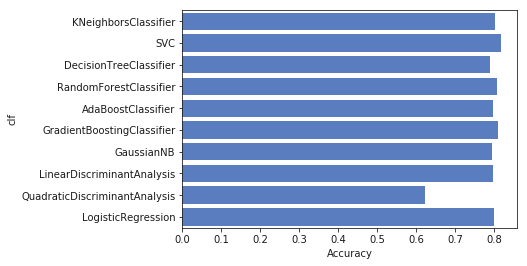

In [119]:
sns.set_color_codes('muted')
sns.barplot('accuracy','clf',data=log,color='b')
plt.xlabel('Accuracy')
plt.ylabel('clf')
plt.show()

In [120]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
clf         10 non-null object
accuracy    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


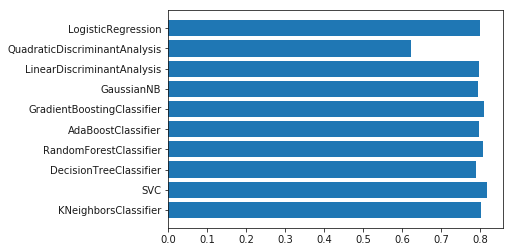

In [121]:
plt.barh(range(10),log.accuracy)
plt.yticks(range(10),log.clf)
plt.show()

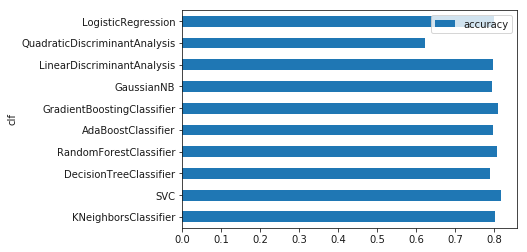

In [128]:
log.plot.barh('clf','accuracy')

In [122]:
candidate=RandomForestClassifier()
candidate.fit(x,y)
candidate.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,